**тематическое моделирование**

_Евгений Борисов <esborisov@sevsu.ru>_

In [1]:
# http://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html

# разложение частотной матрицы [ слова x документы ]  
#
# получаем матрицу с описанием тем [ слова х темы ]   
# и матрицу вероятностей событий "тема описывает документ"  [ темы х документы ]
# 
# [ слова x документы ] = [ слова х темы ] * [ темы х документы ]
# 
# p(w|d) = p(w|t) * p(t|d)

## тексты

In [2]:
import numpy as np
import pandas as pd
pd.options.display.precision = 2 
pd.options.display.max_colwidth = 1000 

In [3]:
# загружаем тексты
data = pd.read_pickle('../data/news.pkl.gz')
print('записей:',len(data))
data.sample(2)

записей: 3196


,text,tag
1733,"Нефть марки Brent торгуется у отметки $57 за баррель Выросла в цене на 4,3%\n\nНефть марки Brent торгуется на Межконтинентальной бирже ICE у отметки $57 за баррель. По фиксингу на 10:30 по московскому времени баррель Brent стоит $56,77.\n\nЕго стоимость выросла на 4,3%. Нефть марки WTI также растет в цене: на то же время ее стоимость сравнялась с $54,07 с изменением в 4,75%.\n\nАналитик «Альпари» Владислав Антонов напомнил, что в пятницу цена на нефть повысилась в ожидании переговоров в ОПЕК. Встреча прошла успешно, и в понедельник, отмечает Владимир, торги по Brent открылись с бычьим гэпом. Нефть уже поднималась в цене выше отметки $57.",economics
1184,"Вертолетная площадка, бассейн, парк, 3-е транспортное кольцо: будущее Курасовщины\n\n2 декабря 2016 в 9:28\n\nЕлена Толкачева / REALTY.TUT.BY / Фото: Вадим Замировский\n\nПроект развития ландшафтно-рекреационной зоны 160 ЛР в Октябрьском районе на общественное обсуждение выставлен по 23 декабря. Речь идет о квартале на пересечении улицы Кижеватова с речкой Лошица и прилегающей территории РНПЦ травматологии и ортопедии. На презентацию проекта пришло не более десятка местных жителей. И, что редко бывает, люди хотели больше послушать архитекторов, чем задать им вопросы.\n\nПо проекту в этом квартале хотят:\n\n— сделать прогулочный парк районного значения;\n\n— построить объекты общепита;\n\n— в 4-м Брестском переулке построить ФОК с бассейнами, тренажерными залами;\n\n— построить вертолетную площадку возле РНПЦ травматологии и ортопедии, которую будут задействовать при необходимости.\n\nТакже (из ранее запланированного) здесь построят спортивные залы, универсальный зрелищно-спортивный...",realty


In [4]:
len( data.drop_duplicates('text') )

3196

## токенайзер

In [5]:
import re
from nltk.tokenize import word_tokenize as nltk_tokenize_word

In [6]:
# def tokenizer(text):
#     return [
#             t for t in nltk_tokenize_word( # разбиваем текст на слова
#                 re.sub(r'</?[a-z]+>',' ',text), # удаляем xml tag 
#                 language='russian'
#             ) 
#         ]

In [7]:
# from nltk.stem.snowball import SnowballStemmer
# stemmer = SnowballStemmer('russian')

from nltk.corpus import stopwords as nltk_stopwords
stopwords = set(nltk_stopwords.words('russian'))

def tokenizer(text,stopwords=stopwords):
    return [
            t for t in nltk_tokenize_word( # разбиваем текст на слова
                re.sub(r'</?[a-z]+>',' ',text), # удаляем xml tag 
                language='russian'
            ) 
            if not (
               False
               or (len(t)<3) # выкидываем очень короткие слова
               or re.match(r'^[^a-zA-ZЁёА-я]+$', t) # выкидываем токены не содержащие букв
               or re.match(r'^(\w)\1+$', t)  # выкидываем токены из одного повторяющегося символа
               or re.match(r'^[^a-zA-ZЁёА-я].*$', t)  # выкидываем токены начинающиеся не с буквы
               or (t in stopwords) # выкидываем предлоги, союзы и т.п.    
            )
        ] 

## выполняем частотный анализ

In [8]:
# from sklearn.feature_extraction.text import CountVectorizer
# tf_model = CountVectorizer(
#         min_df=.01, # выкидываем очень редкие слова
#         max_df=.10, # выкидываем очень частые слова
#         tokenizer=tokenizer, # ф-ция токенайзер
#         token_pattern=None, # отключаем дефолтный токенайзер
#         # binary=True,
#     )

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_model = TfidfVectorizer(
        min_df=.01, # выкидываем очень редкие слова
        max_df=.10, # выкидываем очень частые слова
        use_idf=False, # не используем обратную частоту
        norm='l2', # нормируем TF
        tokenizer=tokenizer, # ф-ция токенайзер
        token_pattern=None, # отключаем дефолтный токенайзер
    )

In [10]:
%%time

data_tf = tf_model.fit_transform( data['text'] )

display(data_tf.shape)

(3196, 2021)

CPU times: user 5.39 s, sys: 26.8 ms, total: 5.42 s
Wall time: 5.43 s


In [11]:
vocab = sorted(tf_model.vocabulary_)
display(len(vocab))
display(vocab)

2021

['adobe',
 'afisha.tut.by',
 'apple',
 'audi',
 'auto.tut.by',
 'facebook',
 'finance.tut.by',
 'flash',
 'html5',
 'http',
 'javascript',
 'journal',
 'kia',
 'lenta.ru',
 'news',
 'player',
 'realty.tut.by',
 'regnum',
 'reuters',
 'sport.tut.by',
 'street',
 'telegram',
 'the',
 'times',
 'tut.by',
 'twitter',
 'volkswagen',
 'wall',
 'youtube',
 'абсолютно',
 'аварии',
 'авария',
 'августа',
 'августе',
 'авто',
 'автобуса',
 'автомобилей',
 'автомобилем',
 'автомобили',
 'автомобиль',
 'автомобиля',
 'автор',
 'авторы',
 'агентства',
 'агентство',
 'администрации',
 'адрес',
 'актер',
 'активно',
 'активность',
 'акции',
 'акций',
 'александр',
 'александра',
 'александром',
 'алексей',
 'алеппо',
 'американская',
 'американские',
 'американский',
 'американских',
 'американского',
 'американской',
 'америки',
 'анализ',
 'аналитики',
 'андрей',
 'андрея',
 'анна',
 'армии',
 'ассоциации',
 'атмосферу',
 'базе',
 'базовой',
 'банк',
 'банка',
 'безопасности',
 'беларуси',
 'белару

## извлечение списка тем и ключевых слов

In [12]:
# извлекаем из модели список тем и ключевых слов
def extract_topics( components, feature_names, n_top_words=5 ):
    return {
        topic_idx : [ feature_names[i] for i in topic.argsort()[:-n_top_words-1:-1] ]
        for topic_idx, topic in enumerate(components)
    }

In [13]:
# from sklearn.decomposition import LatentDirichletAllocation
# # LDA - латентное размещение Дирихле
# tm_model = LatentDirichletAllocation( 
#         n_components=10, 
#         max_iter=5,
#         learning_method='online', 
#         learning_offset=50.,
#         random_state=0, 
#     )

In [14]:
from sklearn.decomposition import NMF
# NMF (generalized Kullback-Leibler divergence) 
tm_model = NMF( 
        n_components=10,
        random_state=1, 
        beta_loss='kullback-leibler', 
        solver='mu', 
        max_iter=1000, 
        l1_ratio=.5 
    )

In [16]:
# список тем и ключевых слов
topics = extract_topics( tm_model.components_, vocab )
topics

{0: ['беларуси', 'tut.by', 'беларусь', 'просто', 'нужно'],
 1: ['президент', 'президента', 'трамп', 'заявил', 'глава'],
 2: ['рублей', 'компании', 'долларов', 'млн', 'компания'],
 3: ['результате', 'дтп', 'водитель', 'мвд', 'сообщили'],
 4: ['версия', 'новый', 'видео', 'нового', 'модели'],
 5: ['народов', 'севера', 'коренных', 'рамках', 'республики'],
 6: ['ученые', 'специалисты', 'алеппо', 'университета', 'людей'],
 7: ['савченко', 'украины', 'суд', 'facebook', 'сети'],
 8: ['место', 'динамо', 'чемпионата', 'мира', 'матче'],
 9: ['стал', 'фильм', 'мира', 'лучший', 'роль']}

In [15]:
data['topic_id'] = np.argmax( tm_model.fit_transform(data_tf),axis=1)

In [86]:
# распределение текстов по темам
# data.groupby(['topic_id']).size().plot.bar(rot=0)

---

In [83]:
# распределение меток текстов по темам
tags = sorted(set(data['tag']))
topic_tags = (
    data[['tag','topic_id']]
    .groupby('topic_id')['tag']
    .apply(lambda t_tags: { t: len([w for w in t_tags if w==t]) for t in tags } )
    .reset_index()
    .rename(columns={'level_1':'tag','tag':'count',})
    .pivot(index='topic_id', columns='tag', values='count')
)
topic_tags.style.background_gradient(cmap='Blues')

tag,auto,culture,economics,health,incident,politics,realty,reclama,science,social,sport,tech,woman
topic_id,,,,,,,,,,,,,
0,27,64,38,13,11,26,40,30,6,55,25,26,30
1,0,17,26,3,1,331,1,0,0,2,14,2,0
2,49,7,157,6,19,16,11,9,20,6,4,65,1
3,30,2,1,2,340,7,1,0,2,6,0,5,0
4,140,21,3,6,5,7,0,6,0,10,13,61,0
5,1,37,45,21,29,75,6,2,3,58,8,27,1
6,0,33,1,36,3,39,2,0,196,4,1,57,1
7,0,8,0,2,27,86,0,0,0,1,8,32,1
8,1,6,0,1,0,2,0,0,0,0,272,3,0


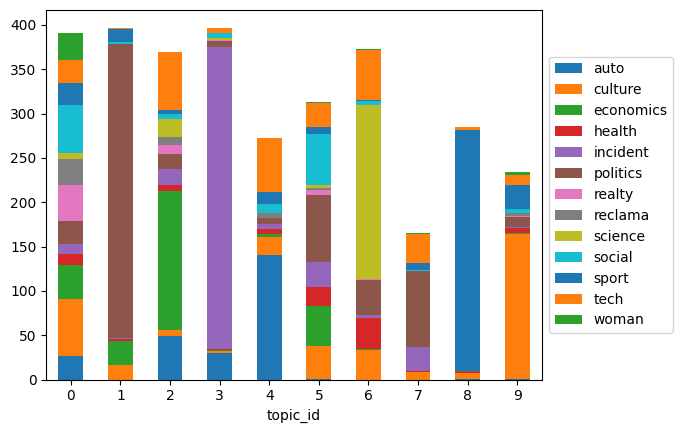

In [84]:
( # распределение количества текстов по темам с долями меток
topic_tags
.plot.bar(stacked=True,rot=0)
.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
)

---

In [85]:
data['keywords'] = data['topic_id'].map(topics)
data.sample(4)

,text,tag,topic_id,keywords
3137,"О традициях финно-угорских и самодийских народов расскажет новый фильм\nНовости-online (Регион-Информ-Москва) О реализации программы ""Улучшение\nжилищных условий населения Ханты-Мансийского автономного округа - Югры на\n2005-2015 годы"" На июльском заседании депутаты окружного парламента заслушали\nинформацию правительства о реализации программы ""Улучшение жилищных условий\nнаселения Ханты-Мансийского автономного округа - Югры на 2005-2015 годы""\nи внесли в нее изменения. //""Тюменские известия"" (Тюмень) 22.07.10,\n""Новоселий в Югре будет больше"", Людмила Богачева На июльском заседании\nдепутаты окружного парламента заслушали информацию правительства о реализации\nпрограммы ""Улучшение жилищных условий населения Ханты-Мансийского автономного\nокруга - Югры на 2005-2015 годы"" и внесли в нее изменения. Общий объем\nфинансирования мероприятий программы в 2009 году составил более 8 миллиардов\n394 миллионов рублей. В рамках ее реализации снесено более 83 тысяч квадратных\nметров ветхог...",culture,2,"[рублей, компании, долларов, млн, компания]"
3122,"Карелия (Петрозаводск) Братья по группе В составе делегации из Эстонии\nпредставители государственных структур, общественных организаций. -\nТере, - приветствовали гостей из Эстонии в Центре национальных культур\nи народного творчества Республики Карелия в Петрозаводске в субботу,\n17 июля. Эстонское приветствие так похоже на карельское . Похожи языки,\nпохожи и народы, карелы и эстонцы находятся в одной финно-угорской группе.\nВ составе делегации из Эстонии представители государственных структур,\nобщественных организаций. Например, советник общества Як Прозес, представитель\nдепартамента охраны памятников старины Ринно Рау, сотрудник лингвистического\nцентра Таллинского университета Елло Рохуллт. Они приехали в нашу республику\nкак туристы, но решили совместить приятное с полезным - заодно познакомиться с\nэтнографией и культурой карелов, вепсов, а также напрямую установить контакты с\nкарельскими учреждениями культуры. Встречала эстонцев, которые пришли в центр\nсразу после п...",politics,5,"[народов, севера, коренных, рамках, республики]"
855,"Клип Тимати и Лепса набрал 2 миллиона просмотров за два дня\r\n\r\n7 декабря 2016 в 17:37\r\n\r\nAFISHA.TUT.BY\r\n\r\nНовый клип с участием Григория Лепса, который выступит 31 марта в «Минск-Арене», всего за пару дней собрал на YouTube около двух миллионов просмотров и пять тысяч комментариев.\r\n\r\nСовместный клип Григория Лепса и Тимати «Дай мне уйти» снят по всем канонам современной клиповой моды, тон которой задала группировка «Ленинград»: 11-минутный фильм с игровым сюжетом, яркими персонажами, Тимати в главной роли и короткими энергичными куплетами от харизматичного Григория Лепса.\r\n\r\n«Я уже сто раз пересмотрела, так нравится», — написала в комментариях к клипу одна из поклонниц.\r\n\r\nОн, она, борщ и теща\r\n\r\nСюжет клипа, больше похожего на короткую новогоднюю киносказку, завязан на классическом семейном треугольнике: состоятельный и очень романтичный муж, пустышка-жена и пробивная теща. В клипе есть все, чего можно ожидать от этих персонажей: скандальный развод, ал...",culture,9,"[стал, фильм, мира, лучший, роль]"
1342,"Белорусы придумали мессенджер, который ""перевернет представление о коммуникации в интернете""\n\n2 декабря 2016 в 12:32\n\n42.TUT.BY\n\nБелорусский стартап Scop завершает разработку мессенджера, который должен «перевернуть представление о коммуникации в интернете». Об этом сообщает сайт Dev.by.\n\nКоманда Scope. Фото: Garage48 / dev.by\n\nИдея Scop — скомбинировать и максимально упростить голосовое, видео- и текстовое общение, расширив возможности мобильного общения. Печатать сообщения в этом мессенджере будет не обязательно.\n\nПрототип программы позволяет вводить сообщения голосом — сервис сам конвертирует их в текст. Также Scop распознает эмоции на лице и превращает их в смайлы.\n\nВнимание! У вас отключен JavaScript, ваш браузер не поддерживает HTML5, или установл